# 1. Representación data con pandas

### 1.1. Importar libreria relevantes

In [70]:
import pandas as pd
import numpy as np

#visualizacion
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2. Abrir data

In [4]:
# leer un archivo csv, ya descargado, e imprimir la cabeza (primero 5 elementos)

In [71]:
df = pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/ds_salaries.csv")

### 1.3. Exploración, filtro y limpieza de la  data

In [72]:
# ver encabezado de la data (las primeras 5 filas)
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [73]:
# mostrar las ultimas 5 lineas, filas o registros
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [11]:
df.info()#resumen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [74]:
# para describir la data, muestra un  resumen estadístico del dataset
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
# muestra una lista con todas las columnas que tiene el data frame
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [75]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [76]:
#hacer consultas especificas del dataframe

df[df.salary_in_usd > 250000]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
25,25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
33,33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
63,63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
78,78,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
93,93,2021,SE,FT,Lead Data Engineer,276000,USD,276000,US,0,US,L
97,97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
157,157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
231,231,2021,SE,FT,ML Engineer,256000,USD,256000,US,100,US,S


In [77]:
df[df.salary_in_usd > 250000].describe() #la descripción  salarios mayores a 250.000

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,16.00000,16.000000,16.000000,16.000000,16.000000
mean,233.06250,2021.062500,360837.500000,360837.500000,78.125000
std,197.70364,0.771902,97733.221066,97733.221066,40.697051
min,1.00000,2020.000000,256000.000000,256000.000000,0.000000
25%,74.25000,2020.750000,269100.000000,269100.000000,87.500000
50%,191.00000,2021.000000,352500.000000,352500.000000,100.000000
75%,432.50000,2022.000000,417750.000000,417750.000000,100.000000
max,534.00000,2022.000000,600000.000000,600000.000000,100.000000


In [78]:
#los valores de cierto campo determinado
df.job_title

,job_title
0,Data Scientist
1,Machine Learning Scientist
2,Big Data Engineer
3,Product Data Analyst
4,Machine Learning Engineer
...,...
602,Data Engineer
603,Data Engineer
604,Data Analyst
605,Data Analyst


In [79]:
# hacer una consulta tipo QUERY
df.query("job_title == 'Data Scientist'") #RECUERDE QUE LA CONSULTA QUERY DEBE SER DENTRO DE UNA CADENA

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
593,593,2022,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
596,596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M


In [80]:
# las filas determinadas
df.iloc[20:40]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
20,20,2020,MI,FT,Machine Learning Engineer,299000,CNY,43331,CN,0,CN,M
21,21,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IN,L
22,22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
23,23,2020,MI,FT,BI Data Analyst,98000,USD,98000,US,0,US,M
24,24,2020,MI,FT,Lead Data Scientist,115000,USD,115000,AE,0,AE,L
25,25,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
26,26,2020,EN,FT,Research Scientist,42000,USD,42000,NL,50,NL,L
27,27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
28,28,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
29,29,2020,SE,FT,Machine Learning Manager,157000,CAD,117104,CA,50,CA,L


In [81]:
#columnas especificas de una dataframe
df[["job_title", "salary"]]

,job_title,salary
0,Data Scientist,70000
1,Machine Learning Scientist,260000
2,Big Data Engineer,85000
3,Product Data Analyst,20000
4,Machine Learning Engineer,150000
...,...,...
602,Data Engineer,154000
603,Data Engineer,126000
604,Data Analyst,129000
605,Data Analyst,150000


In [82]:
'''otra forma es con la estructura iloc, pero no dando nombres sino posiciones
recordar que la primera posicion es filas las demÁs columnas)'''

df.iloc[:, [2,4,5]]

,experience_level,job_title,salary
0,MI,Data Scientist,70000
1,SE,Machine Learning Scientist,260000
2,SE,Big Data Engineer,85000
3,MI,Product Data Analyst,20000
4,SE,Machine Learning Engineer,150000
...,...,...,...
602,SE,Data Engineer,154000
603,SE,Data Engineer,126000
604,SE,Data Analyst,129000
605,SE,Data Analyst,150000


In [83]:
# columnas determinadas y filas determinadas (estas ultimas son las primeras)
df.iloc[10:40, [2,4,5]]

,experience_level,job_title,salary
10,EN,Data Scientist,45000
11,MI,Data Scientist,3000000
12,EN,Data Scientist,35000
13,MI,Lead Data Analyst,87000
14,MI,Data Analyst,85000
15,MI,Data Analyst,8000
16,EN,Data Engineer,4450000
17,SE,Big Data Engineer,100000
18,EN,Data Science Consultant,423000
19,MI,Lead Data Engineer,56000


In [84]:
# las columnas con nombres y no por posicion, desde una a otra
df.loc[:,"experience_level": "job_title"]

,experience_level,employment_type,job_title
0,MI,FT,Data Scientist
1,SE,FT,Machine Learning Scientist
2,SE,FT,Big Data Engineer
3,MI,FT,Product Data Analyst
4,SE,FT,Machine Learning Engineer
...,...,...,...
602,SE,FT,Data Engineer
603,SE,FT,Data Engineer
604,SE,FT,Data Analyst
605,SE,FT,Data Analyst


In [85]:
#otra forma de consultar, parecido al query
df.loc[df["experience_level"]== "MI"]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
...,...,...,...,...,...,...,...,...,...,...,...,...
567,567,2022,MI,FT,Data Analyst,50000,GBP,65438,GB,0,GB,M
586,586,2022,MI,FT,Data Analyst,35000,GBP,45807,GB,0,GB,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
599,599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M


In [86]:
# columnas especifica  en una consulta de comparación
df.loc[df["experience_level"]== "MI", ["job_title",	"salary"]]

,job_title,salary
0,Data Scientist,70000
3,Product Data Analyst,20000
7,Data Scientist,11000000
8,Business Data Analyst,135000
11,Data Scientist,3000000
...,...,...
567,Data Analyst,50000
586,Data Analyst,35000
598,Data Scientist,160000
599,Data Scientist,130000


In [87]:
# ordenar consulta de forma ascendente
df.loc[df["experience_level"]== "MI", ["job_title",	"salary"]].sort_values("salary", ascending=True)


,job_title,salary
185,Data Engineer,4000
15,Data Analyst,8000
184,Machine Learning Scientist,12000
192,Big Data Engineer,18000
208,Data Engineer,20000
...,...,...
136,ML Engineer,7000000
137,ML Engineer,8500000
7,Data Scientist,11000000
102,BI Data Analyst,11000000


In [88]:
#cambiar el nombre de una columna
df.rename(columns= {"salary": "salario"})

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salario,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [89]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [90]:
# borrar columnas
df.drop(columns={"salary"})

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


In [91]:
# agregar una nueva columna o modificarla
df["salario_en_pesos"] = df.salary_in_usd * 4500
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,359248500
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1170000000
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,490608000
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,90000000
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,675000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,693000000
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,567000000
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,580500000
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,675000000


In [92]:
# obtener muestras aleatorias
df.sample(frac=0.5) #fragmento deel 50 por ciento de los datos

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
343,343,2022,EX,FT,Head of Data Science,167875,USD,167875,US,100,US,M,755437500
439,439,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M,742482000
252,252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L,2700000000
312,312,2022,MI,FT,Data Scientist,30000,GBP,39263,GB,0,GB,M,176683500
430,430,2022,MI,FT,Data Analyst,40000,EUR,43966,ES,100,ES,M,197847000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,557,2022,SE,FT,Data Engineer,70500,USD,70500,US,0,US,M,317250000
375,375,2022,EX,FT,Lead Data Engineer,150000,CAD,118187,CA,100,CA,S,531841500
572,572,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M,450000000
298,298,2022,SE,FT,Data Scientist,136620,USD,136620,US,100,US,M,614790000


In [93]:
df.sample(n=100) #numero determinado de muestras

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
187,187,2021,EX,FT,Data Science Consultant,59000,EUR,69741,FR,100,ES,S,313834500
105,105,2021,MI,FT,Data Analyst,37456,GBP,51519,GB,50,GB,L,231835500
529,529,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M,406440000
116,116,2021,MI,FT,Data Scientist,50000,USD,50000,NG,100,NG,L,225000000
59,59,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M,622575000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,130,2021,EN,FT,Machine Learning Developer,100000,USD,100000,IQ,50,IQ,S,450000000
100,100,2021,MI,FT,Data Analyst,75000,USD,75000,US,0,US,L,337500000
224,224,2021,SE,FT,Machine Learning Scientist,225000,USD,225000,US,100,CA,L,1012500000
385,385,2022,SE,FT,Data Engineer,132320,USD,132320,US,100,US,M,595440000


In [94]:
# agrupar datos determinados y bajo una medida
df.groupby("job_title").mean(numeric_only=True)

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,salario_en_pesos
job_title,,,,,,
3D Computer Vision Researcher,77.000000,2021.000000,4.000000e+05,5409.000000,50.000000,2.434050e+07
AI Scientist,254.142857,2021.142857,2.905714e+05,66135.571429,78.571429,2.976101e+08
Analytics Engineer,458.250000,2022.000000,1.750000e+05,175000.000000,50.000000,7.875000e+08
Applied Data Scientist,351.600000,2021.600000,1.724000e+05,175655.000000,70.000000,7.904475e+08
Applied Machine Learning Scientist,321.000000,2021.500000,1.413500e+05,142068.750000,87.500000,6.393094e+08
BI Data Analyst,106.333333,2020.833333,1.902045e+06,74755.166667,66.666667,3.363982e+08
Big Data Architect,255.000000,2021.000000,1.250000e+05,99703.000000,50.000000,4.486635e+08
Big Data Engineer,123.125000,2020.625000,4.550000e+05,51974.000000,50.000000,2.338830e+08
Business Data Analyst,256.800000,2021.000000,3.550000e+05,76691.200000,90.000000,3.451104e+08


In [95]:
df.groupby("job_title").mean(numeric_only=True).count() #cuenta elementos de la agrupación

,0
Unnamed: 0,50
work_year,50
salary,50
salary_in_usd,50
remote_ratio,50
salario_en_pesos,50


In [96]:
df.groupby("job_title").agg({
    "salary": ["max", "mean"]
})  #agrupar por una columan y determinadas medidas

salary              
                                               max          mean
job_title                                                       
3D Computer Vision Researcher               400000  4.000000e+05
AI Scientist                               1335000  2.905714e+05
Analytics Engineer                          205300  1.750000e+05
Applied Data Scientist                      380000  1.724000e+05
Applied Machine Learning Scientist          423000  1.413500e+05
BI Data Analyst                           11000000  1.902045e+06
Big Data Architect                          125000  1.250000e+05
Big Data Engineer                          1672000  4.550000e+05
Business Data Analyst                      1400000  3.550000e+05
Cloud Data Engineer                         160000  1.400000e+05
Computer Vision Engineer                    180000  8.350000e+04
Computer Vision Software Engineer           150000  1.003333e+05
Data Analyst                                450000  9.660496e+04
Data Analytics Engineer                     110000  6.175000e+04
Data Analytics Lead                         405000  4.050000e+05
Data Analytics Manager                      150260  1.271343e+05
Data Architect                              266400  1.778739e+05
Data Engineer                              4450000  1.792106e+05
Data Engineering Manager                    174000  1.197998e+05
Data Science Consultant                     423000  1.227143e+05
Data Science Engineer                       159500  8.450000e+04
Data Science Manager                       7000000  1.062599e+06
Data Scientist                            30400000  5.083472e+05
Data Specialist                             165000  1.650000e+05
Director of Data Engineering                200000  1.412500e+05
Director of Data Science                    325000  1.932857e+05
ETL Developer                                50000  5.000000e+04
Finance Data Analyst                         45000  4.500000e+04
Financial Data Analyst                      450000  2.750000e+05
Head of Data                                235000  1.564000e+05
Head of Data Science                        224000  1.467188e+05
Head of Machine Learning                   6000000  6.000000e+06
Lead Data Analyst                          1450000  5.690000e+05
Lead Data Engineer                          276000  1.403333e+05
Lead Data Scientist                        3000000  1.101667e+06
Lead Machine Learning Engineer               80000  8.000000e+04
ML Engineer                                8500000  2.676667e+06
Machine Learning Developer                  100000  1.000000e+05
Machine Learning Engineer                  4900000  2.727179e+05
Machine Learning Infrastructure Engineer    195000  9.733333e+04
Machine Learning Manager                    157000  1.570000e+05
Machine Learning Scientist                  260000  1.584125e+05
Marketing Data Analyst                       75000  7.500000e+04
NLP Engineer                                240000  2.400000e+05
Principal Data Analyst                      170000  1.225000e+05
Principal Data Engineer                     600000  3.283333e+05
Principal Data Scientist                    416000  2.067143e+05
Product Data Analyst                        450000  2.350000e+05
Research Scientist                          450000  1.104937e+05
Staff Data Scientist                        105000  1.050000e+05

In [97]:
# agrupar datos determinados y bajo una medida
df.job_title.value_counts()

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Machine Learning Scientist,8
Big Data Engineer,8


In [98]:
df.shape #tamaño de data

(607, 13)

In [99]:
#elementos unicos de cada columna
df.nunique()

,0
Unnamed: 0,607
work_year,3
experience_level,4
employment_type,4
job_title,50
salary,272
salary_currency,17
salary_in_usd,369
employee_residence,57
remote_ratio,3


In [100]:
df.isnull().sum() #que datos son nulos

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


# 2. Visualización de datos con Matplolib

### 2.1. Gráfico de barras

In [34]:
#las primeras 10 empleos mas comunes
top10_job_title = df['job_title'].value_counts()[:10]

In [101]:
top10_job_title

,count
job_title,
Data Scientist,143
Data Engineer,132
Data Analyst,97
Machine Learning Engineer,41
Research Scientist,16
Data Science Manager,12
Data Architect,11
Machine Learning Scientist,8
Big Data Engineer,8


**Lineas de codificación**
* px.bar(...): Crea un gráfico de barras.
* x=top10_job_title.index: Usa los títulos de trabajo (índices de la serie) como el eje X.
* y=top10_job_title.values: Usa la cantidad de veces que aparecen los títulos como eje Y.
* color=top10_job_title.index: Asigna diferentes colores a cada categoría (título de trabajo).
* color_discrete_sequence=px.colors.sequential.PuBuGn: Usa una paleta de colores predefinida (PuBuGn).
* text=top10_job_title.values: Muestra los valores sobre las barras.
* title='2.1.2. Top 10 Job Titles': Agrega un título al gráfico.
* template='plotly_dark': Usa un tema oscuro para el diseño.

In [102]:
fig = px.bar(y=top10_job_title.values,
             x=top10_job_title.index,
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             template= 'plotly_dark')
fig.show()


El método update_layout() se usa para modificar el diseño del gráfico. Aquí está lo que hace cada argumento:

* xaxis_title="Job Titles" : Cambia el título del eje X a "Job Titles" (Títulos de Trabajo).
y Este eje representa las categorías (diferentes títulos de trabajo).

*yaxis_title="count" : Cambia el título del eje Y a "count" (Cantidad).
Este eje muestra la frecuencia de cada título de trabajo en los datos.

* font=dict(size=17, family="Franklin Gothic") Ajusta el tamaño y la fuente del texto en el gráfico.
size=17: Aumenta el tamaño del texto a 17 puntos.
family="Franklin Gothic": Usa la fuente "Franklin Gothic" para los textos.

In [103]:
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### 2.2. Gráfico de tortas

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64


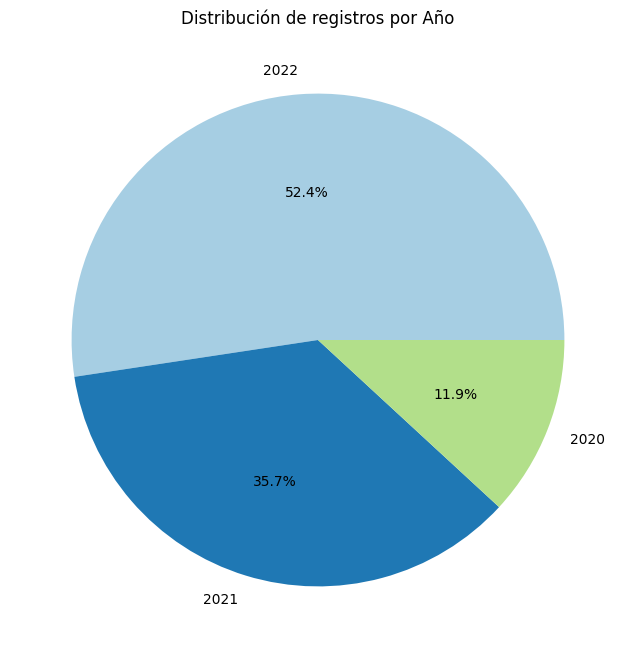

In [104]:
# Contar cuántos registros hay por año
conteo_anios = df["work_year"].value_counts()
print(conteo_anios)

# Crear el gráfico de torta
plt.figure(figsize=(8,8))
plt.pie(conteo_anios, labels=conteo_anios.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)

# Título y mostrar gráfico
plt.title("Distribución de registros por Año")
plt.show()

### 2.3. Gráfico de líneas o dispersión

vamos a construir un digrama de lineas por cada variable cuantitativa, sirve para ver el comportramiento de una variable en el tiempo


In [105]:
#seleccionamos solo tipo de datos numericos
df_cuant= df.select_dtypes(include=['int64', 'float64'])
df_cuant

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,salario_en_pesos
0,0,2020,70000,79833,0,359248500
1,1,2020,260000,260000,0,1170000000
2,2,2020,85000,109024,50,490608000
3,3,2020,20000,20000,0,90000000
4,4,2020,150000,150000,50,675000000
...,...,...,...,...,...,...
602,602,2022,154000,154000,100,693000000
603,603,2022,126000,126000,100,567000000
604,604,2022,129000,129000,0,580500000
605,605,2022,150000,150000,100,675000000


In [ ]:
#grafica uno por uno

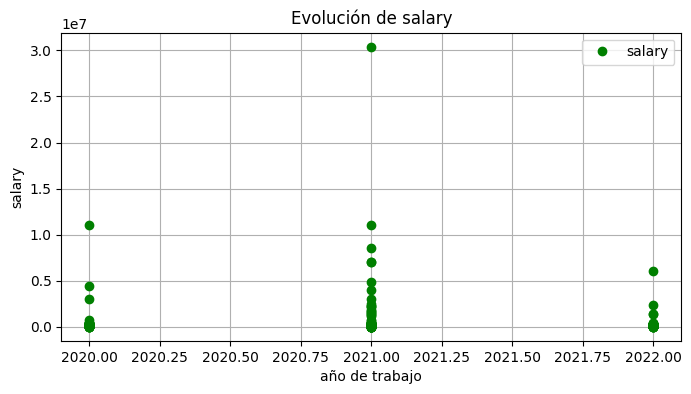

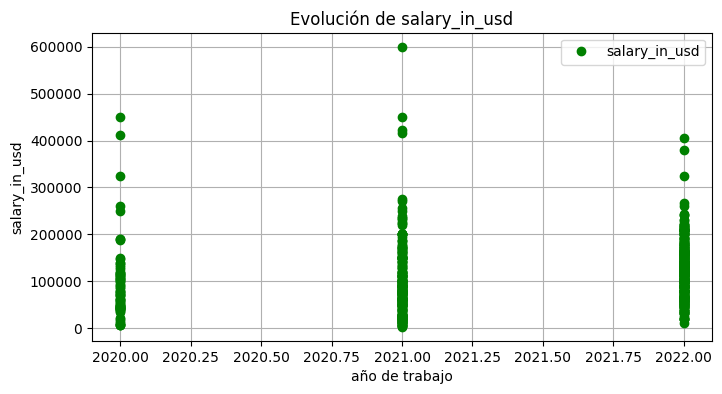

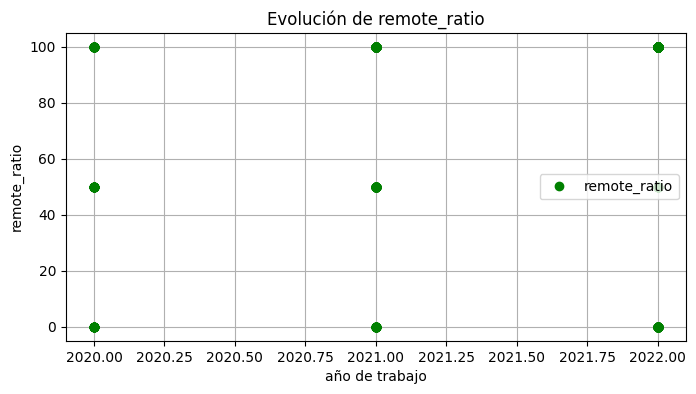

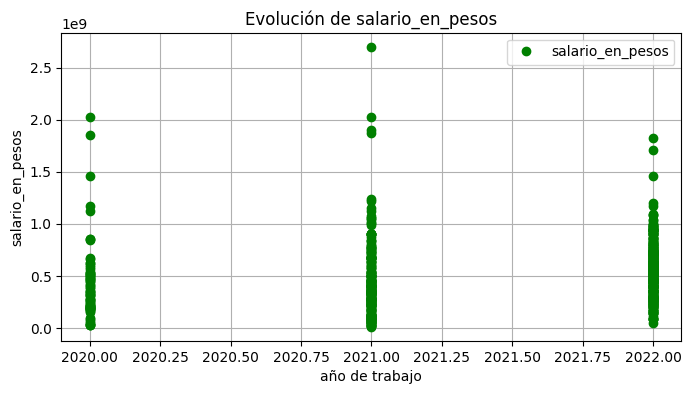

In [106]:
for i in range(2, df_cuant.shape[1]): #no toma la columna año, y va a iterar sobre el numero de columnas que es segundo espacio
    plt.figure(figsize=(8, 4))  # Crear una nueva figura para cada gráfico

    plt.plot(df_cuant.work_year, df_cuant.iloc[:, i], marker="o", linestyle="",color="green", label=df_cuant.columns[i])

    # Personalización del gráfico
    plt.xlabel("año de trabajo")
    plt.ylabel(df_cuant.columns[i])
    plt.title(f"Evolución de {df_cuant.columns[i]}")
    plt.legend()
    plt.grid(True)

    plt.show()  # Mostrar cada gráf

### 2.4. Distribución normal

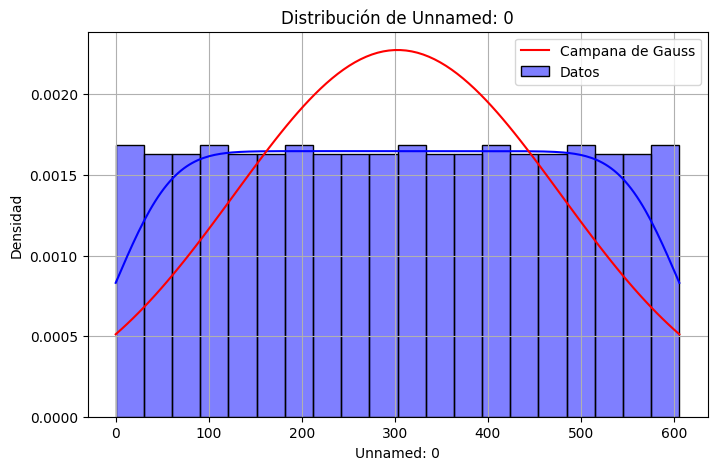

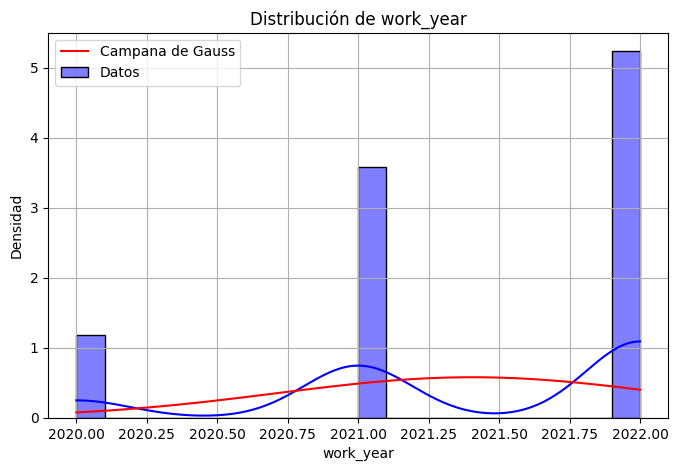

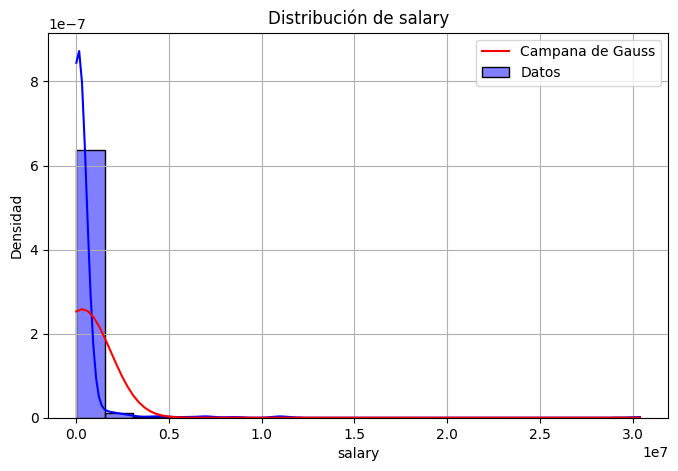

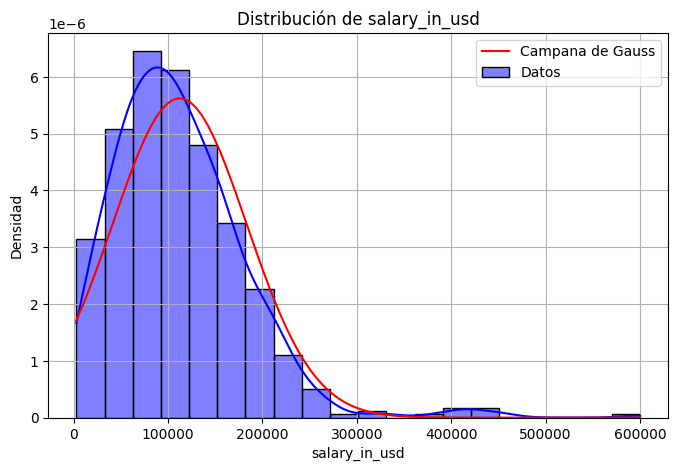

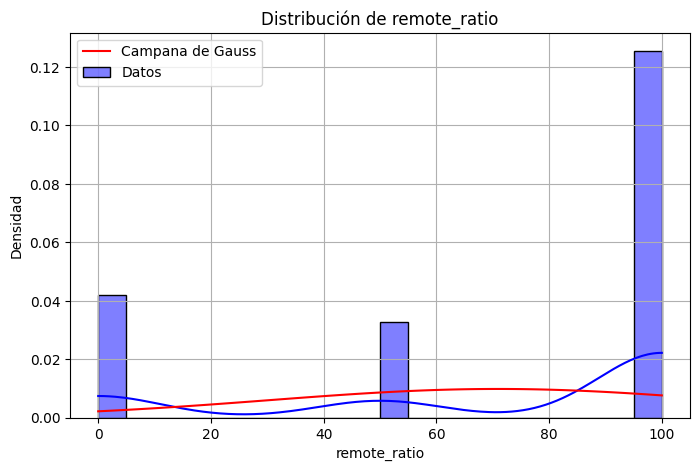

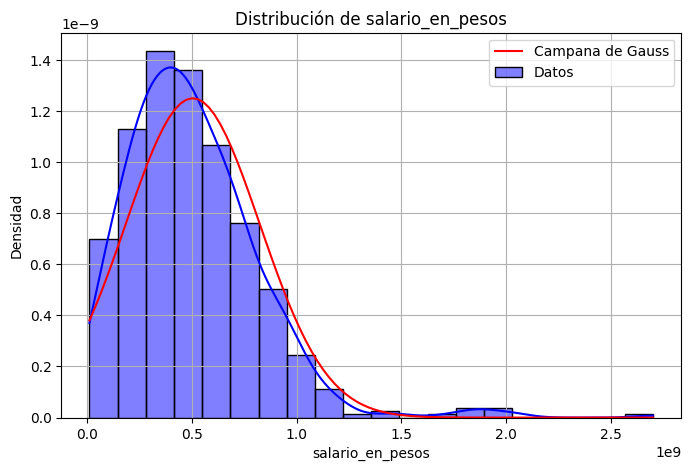

In [107]:
# Graficar cada variable numérica con su campana de Gauss
for columna in df_cuant.columns:
    plt.figure(figsize=(8, 5))  # Nueva figura para cada variable

    # Histograma con densidad
    sns.histplot(df_cuant[columna], kde=True, bins=20, stat="density", color="blue", label="Datos")

    # Ajuste de la curva normal teórica
    media = df_cuant[columna].mean()
    desviacion = df_cuant[columna].std()
    x = np.linspace(df_cuant[columna].min(), df_cuant[columna].max(), 100) #linea de ahuste de la cuerva
    y = norm.pdf(x, media, desviacion)
    plt.plot(x, y, color="red", label="Campana de Gauss")

    # Personalización del gráfico
    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)

    plt.show()  # Muestra cada gráfico individualmente


### 2.5. Matriz de correlacion

la correlacción entre los datos, sirve para revisar la relacion de los datos

In [108]:
correlacion = df_cuant.corr() #hallar valor de datos relacionados
correlacion

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,salario_en_pesos
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000,0.167025
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314,0.170493
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608,-0.083906
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122,1.000000
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000,0.132122
salario_en_pesos,0.167025,0.170493,-0.083906,1.000000,0.132122,1.000000


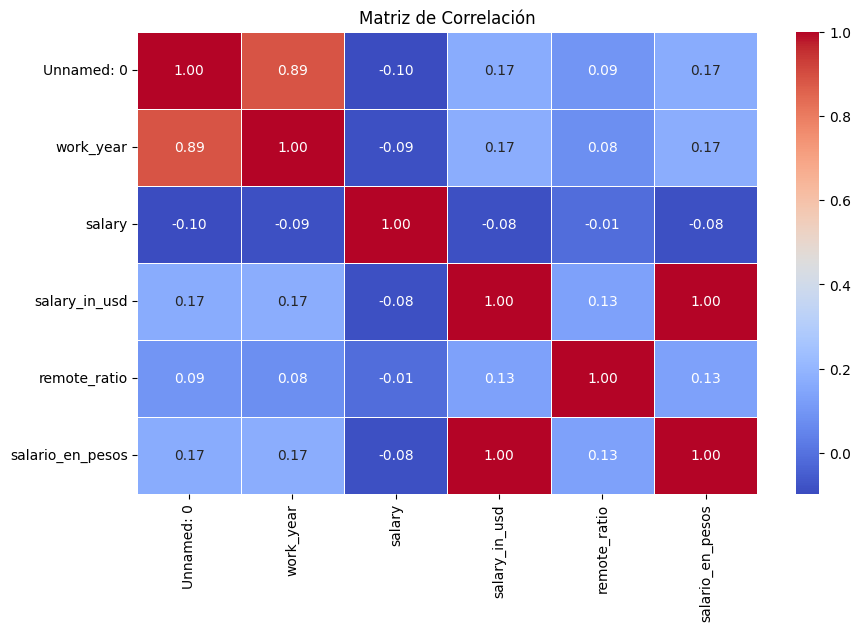

In [109]:
# graficad
correlacion = df_cuant.corr()
# 🔹 Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

### 2.6. Diagrama de cajas

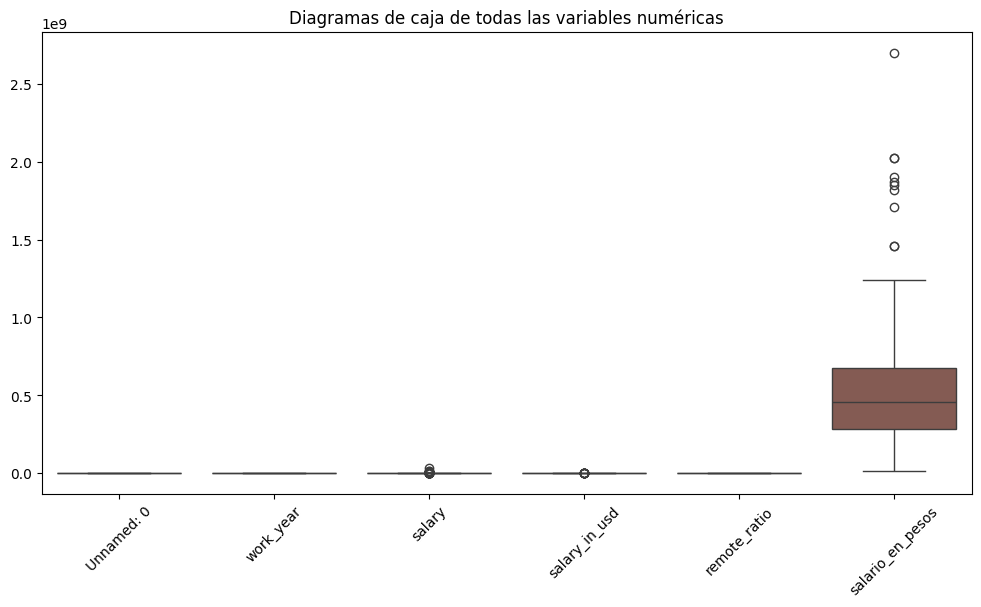

In [110]:

# 🔹 Crear un boxplot para todas las columnas numéricas
plt.figure(figsize=(12,6))  # Tamaño del gráfico
sns.boxplot(df_cuant)

# 🔹 Mejorar visualización
plt.xticks(rotation=45)  # Rotar nombres de variables
plt.title("Diagramas de caja de todas las variables numéricas")

# 🔹 Mostrar gráfico
plt.show()


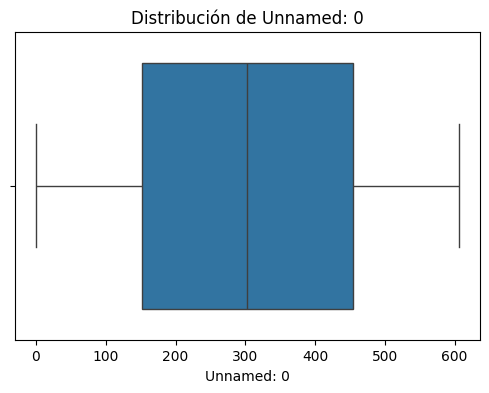

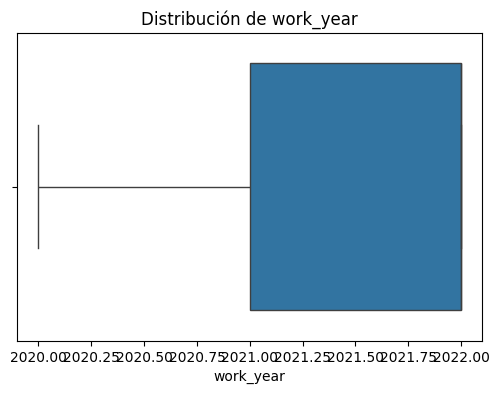

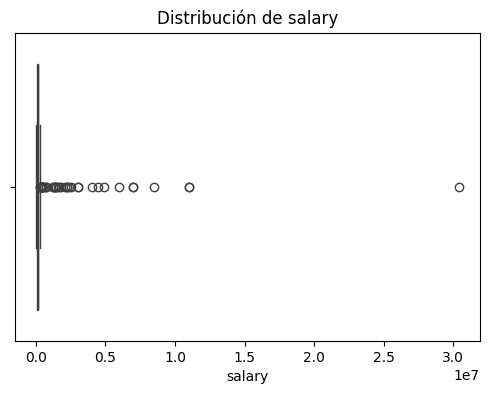

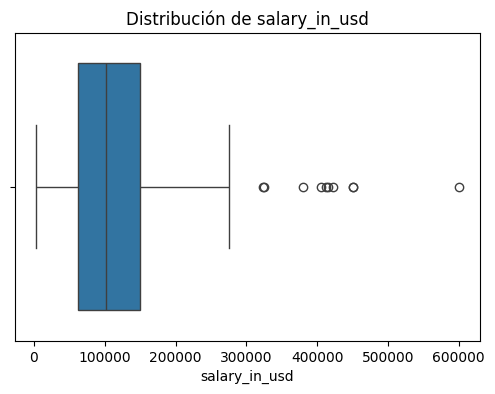

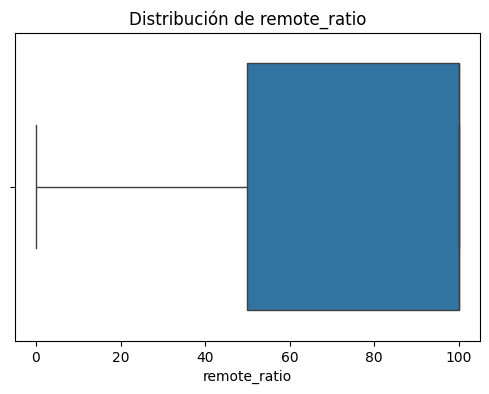

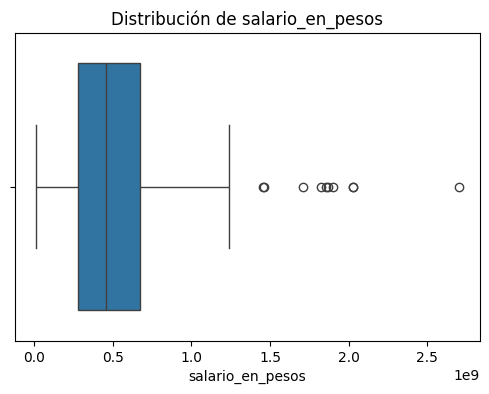

In [111]:

for i in range(0, df_cuant.shape[1]):
    plt.figure(figsize=(6,4))  # Tamaño de cada gráfico
    sns.boxplot(x=df_cuant.iloc[:, i])
    plt.title(f"Distribución de {df_cuant.columns[i]}")  # Título con el nombre de la variable
    plt.show()


### 2.7. Diagrama de nulos

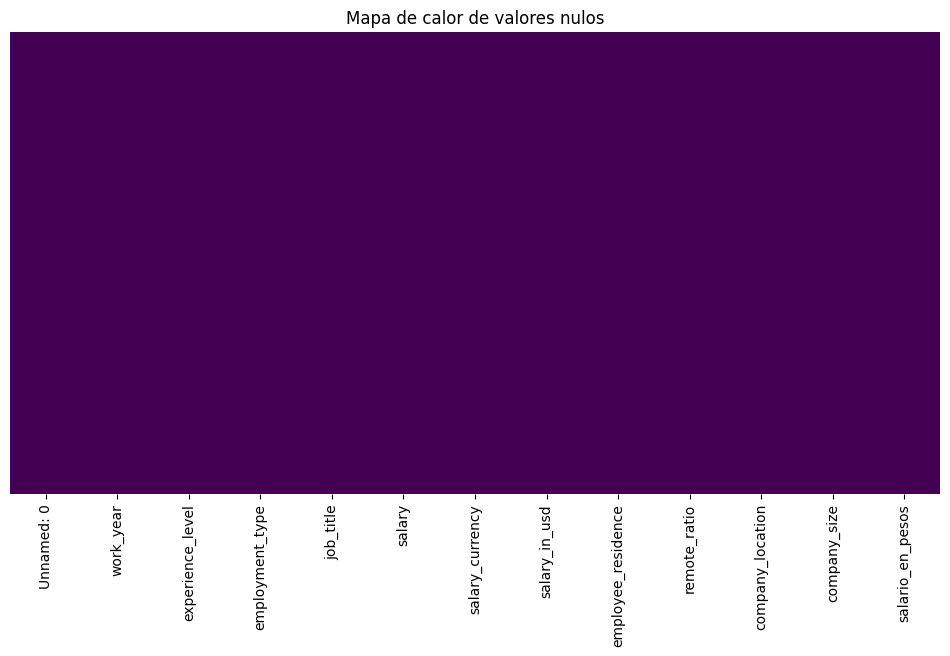

In [112]:
#valores nulos en toda la data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

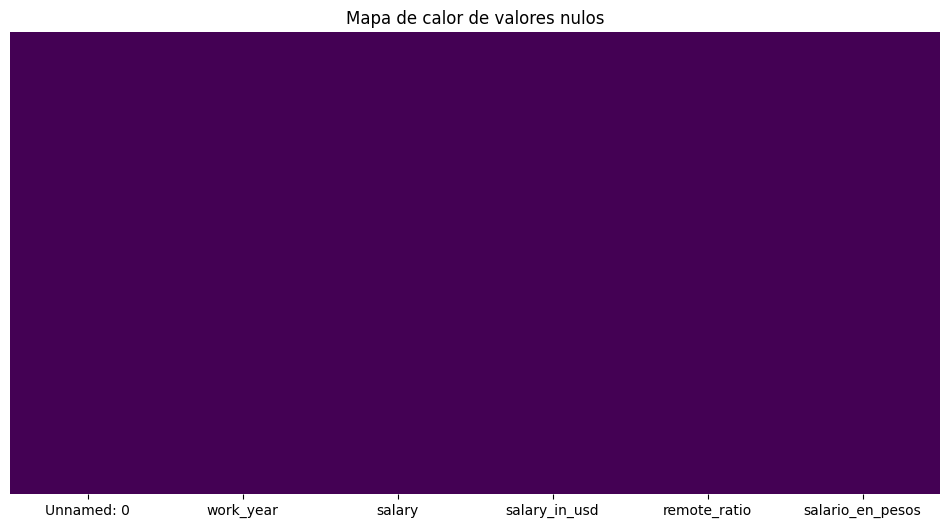

In [113]:
# nulos en  df_cuant
plt.figure(figsize=(12,6))
sns.heatmap(df_cuant.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

### 2.8 Análisis final Exploratorio

## 📌 Conclusiones generales del análisis exploratorio del dataset `ds_salaries`

### 1. Descripción general del conjunto de datos

* El dataset tiene **607 registros** y **12 columnas**.
* No se encontraron **valores nulos** en ninguna variable → la calidad de datos es buena para empezar a trabajar.
* La columna `Unnamed: 0` es simplemente un **índice exportado** y no aporta información; en etapas posteriores se puede eliminar.
* El periodo cubierto va de **2020 a 2022**, pero la mayoría de registros son de **2021 y 2022**, por lo que las comparaciones por año deben hacerse con cuidado (hay menos datos en 2020).

### 2. Variables categóricas principales

* **`experience_level`** tiene 4 niveles: EN (Entry), MI (Mid), SE (Senior), EX (Expert). La mayoría de los registros se concentran en **MI y SE**, mientras que EX es minoritario.
* **`employment_type`** está dominada por contratos **Full-Time (FT)**; los otros tipos (PT, CT, FL) aparecen poco.
* **`remote_ratio`** solo toma tres valores: **0, 50 y 100**, con un claro predominio de trabajos **100% remotos**.
* **`company_size`** tiene 3 categorías (S, M, L); la mayoría son empresas **medianas y grandes**, y las pequeñas son minoría.
* Hay bastante diversidad en:

  * `job_title` (≈ 50 cargos diferentes).
  * `employee_residence` y `company_location` (muchos países distintos), lo que refleja un mercado laboral global.

### 3. Variable objetivo: `salary_in_usd`

* `salary_in_usd` es una buena candidata a **variable objetivo (Y)** porque:

  * Está expresada en una misma unidad (USD).
  * No tiene nulos.
  * Representa el salario final comparable entre países.
* Estadísticas importantes:

  * **Mediana** ≈ 101.570 USD
  * **Rango intercuartílico (IQR)** ≈ 62.726 – 150.000 USD
  * **Mínimo** ≈ 2.859 USD
  * **Máximo** = 600.000 USD
* La distribución de `salary_in_usd`:

  * Tiene forma **cuasi normal en la parte central**, pero
  * Presenta un **sesgo positivo claro** (cola larga hacia salarios altos).
  * Existen **varios valores atípicos (outliers)** en la parte alta (salarios muy elevados), especialmente por encima del percentil 95–99.
  * La parte baja parece “cortada” (no hay salarios extremadamente pequeños), lo cual sugiere un **límite inferior natural** (por ejemplo, salarios mínimos o filtrado de registros muy bajos).

 **👉 Conclusión:**
La variable **no es completamente normal**; es **cuasi normal con sesgo a la derecha y outliers altos**, algo típico en variables económicas como salarios.

### 4. Relación de `salary_in_usd` con otras variables

#### 4.1. Variables numéricas

* Las correlaciones lineales de `salary_in_usd` con:

  * `work_year` ≈ 0.17
  * `remote_ratio` ≈ 0.13

son **positivas pero débiles**, lo que indica que:

* Los salarios tienden a ser un poco más altos en años recientes.
* Los trabajos más remotos (remote_ratio más alto) tienden a pagar algo más, pero no de forma lineal fuerte.

#### 4.2. Variables categóricas (analizadas por grupos)

Aunque la correlación numérica es baja, al agrupar sí se ven patrones claros:

* Por **nivel de experiencia (`experience_level`)**:

  * EN: salario medio ≈ 61.6k USD
  * MI: salario medio ≈ 88.0k USD
  * SE: salario medio ≈ 138.6k USD
  * EX: salario medio ≈ 199.4k USD

  👉 Hay una **relación muy clara y creciente** entre experiencia y salario: a mayor experiencia, mayor salario promedio y mediano.

* Por **tamaño de empresa (`company_size`)**:

  * S (pequeña): media ≈ 77.6k
  * M (mediana): media ≈ 116.9k
  * L (grande): media ≈ 119.2k

  👉 Las **empresas pequeñas pagan menos** en promedio; las medianas y grandes tienen salarios similares y más altos.

* Por **porcentaje de trabajo remoto (`remote_ratio`)**:

  * 0% remoto: media ≈ 106.3k
  * 50% remoto: media ≈ 80.8k
  * 100% remoto: media ≈ 122.4k

  👉 Los trabajos **100% remotos** muestran, en promedio, los **salarios más altos**, lo que sugiere que el mercado internacional y remoto puede pagar mejor.

### 5. Nulos y calidad de datos

* Este dataset **no presenta valores nulos**, lo que facilita la fase de exploración y evita, de momento, la necesidad de imputación.
* En una fase posterior se podría:

  * Eliminar la columna `Unnamed: 0` por ser un índice redundante.
  * Revisar coherencias adicionales (por ejemplo, coherencia entre `salary`, `salary_currency` y `salary_in_usd`), pero esto ya es parte de una limpieza más fina o de detección de posibles errores.

### 6. Implicaciones para etapas futuras (Misión 2 en adelante)

* Dado el **sesgo positivo y los outliers** de `salary_in_usd`, si se usan **modelos lineales**, será recomendable:

  * Considerar una **transformación logarítmica** de la variable objetivo (por ejemplo `log(salary_in_usd + 1)`).
* Dado que las relaciones lineales simples son débiles, pero por grupos sí hay patrones fuertes, será muy natural probar **modelos basados en árboles** (Random Forest, Gradient Boosting, etc.) más adelante.
* Para esta **Misión 1 de exploración**, **no es necesario** aplicar transformaciones; basta con:

  * Describir la distribución,
  * Reconocer la presencia de outliers,
  * Identificar posibles relaciones y patrones.

---

### ✅ Conclusión final

> El dataset `ds_salaries` es adecuado para continuar con fases posteriores de análisis y modelado. No presenta valores nulos y contiene una buena variedad de variables numéricas y categóricas. La variable objetivo `salary_in_usd` muestra una distribución cuasi normal con sesgo positivo y valores atípicos altos, algo esperado en datos de salarios. Aunque la correlación lineal con otras variables numéricas es baja, al agrupar por experiencia, tamaño de empresa y porcentaje de trabajo remoto se observan patrones claros: mayores niveles de experiencia, empresas más grandes y trabajos totalmente remotos tienden a asociarse con salarios más altos. En fases posteriores será importante considerar transformaciones de la variable objetivo y el uso de modelos no lineales para capturar mejor estas relaciones.


# 3.  Preprocesamiento de la data

Al revisar el gráfico de correlaciones no se presentan relaciones líneales, entre los datos actuales para aplicar modelos como los de regresión lineal, así que para este caso exploraremos cambios en la data con nuevas variables.

### 3.1. Eliminar columnas irrelevantes

In [114]:
df_cuant # consulta de datos cuantitativos actuales

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,salario_en_pesos
0,0,2020,70000,79833,0,359248500
1,1,2020,260000,260000,0,1170000000
2,2,2020,85000,109024,50,490608000
3,3,2020,20000,20000,0,90000000
4,4,2020,150000,150000,50,675000000
...,...,...,...,...,...,...
602,602,2022,154000,154000,100,693000000
603,603,2022,126000,126000,100,567000000
604,604,2022,129000,129000,0,580500000
605,605,2022,150000,150000,100,675000000


In [122]:
df_cuant= df_cuant.drop(columns=["Unnamed: 0","salary", "salario_en_pesos"], inplace=False) #eliminar que no aporta al estudio
df_cuant

,work_year,salary_in_usd,remote_ratio
0,2020,79833,0
1,2020,260000,0
2,2020,109024,50
3,2020,20000,0
4,2020,150000,50
...,...,...,...
602,2022,154000,100
603,2022,126000,100
604,2022,129000,0
605,2022,150000,100


### 3.2 Adicionar y re-estructurar columnas

Recordemos que el propósito principal es predecir el salario en data science (salary_in_usd).
Para lograr un modelo sólido, necesitamos construir un conjunto de datos más robusto, incorporando variables que aporten información útil al proceso de predicción.

Aunque los modelos sencillos como la regresión lineal funcionan mejor con variables numéricas, también podemos utilizar variables cualitativas siempre que las transformemos a valores numéricos mediante técnicas de codificación.

Estas transformaciones permiten que el modelo “lea” y procese características categóricas importantes.

Vamos a tomar algunas columnas relevantes del dataset original, por ejemplo:

🔵 experience_level

Es una variable que sí tiene orden (EN < MI < SE < EX), por lo que corresponde aplicar una codificación ordinal (Ordinal/Label Encoding).

🟣 company_location

Es una variable sin orden (países), por lo que requiere One-Hot Encoding, generando una columna por cada categoría.

Con estas transformaciones añadiremos características significativas a nuestra base de datos, haciéndola más informativa y lista para entrenar modelos predictivos.

In [116]:
df # analizar comumnas

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,359248500
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1170000000
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,490608000
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,90000000
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,675000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,693000000
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,567000000
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,580500000
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,675000000


In [123]:
df_cuant

,work_year,salary_in_usd,remote_ratio
0,2020,79833,0
1,2020,260000,0
2,2020,109024,50
3,2020,20000,0
4,2020,150000,50
...,...,...,...
602,2022,154000,100
603,2022,126000,100
604,2022,129000,0
605,2022,150000,100


In [124]:
df_unido = pd.concat([df_cuant, df["experience_level"], df["company_size"]], axis=1) # unir datas

In [125]:
df_unido

,work_year,salary_in_usd,remote_ratio,experience_level,company_size
0,2020,79833,0,MI,L
1,2020,260000,0,SE,S
2,2020,109024,50,SE,M
3,2020,20000,0,MI,S
4,2020,150000,50,SE,L
...,...,...,...,...,...
602,2022,154000,100,SE,M
603,2022,126000,100,SE,M
604,2022,129000,0,SE,M
605,2022,150000,100,SE,M


**Ordinal encoding**

In [126]:
df_unido['experience_level'].unique() #sacar val unicos


array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [127]:
# convierte en label encoding
orden_experiencia = {
    'EN': 0,
    'MI': 1,
    'SE': 2,
    'EX': 3
}

df_unido["experience_level_tr"] = df_unido["experience_level"].map(orden_experiencia)


In [128]:
df_unido

,work_year,salary_in_usd,remote_ratio,experience_level,company_size,experience_level_tr
0,2020,79833,0,MI,L,1
1,2020,260000,0,SE,S,2
2,2020,109024,50,SE,M,2
3,2020,20000,0,MI,S,1
4,2020,150000,50,SE,L,2
...,...,...,...,...,...,...
602,2022,154000,100,SE,M,2
603,2022,126000,100,SE,M,2
604,2022,129000,0,SE,M,2
605,2022,150000,100,SE,M,2


In [129]:
df_unido.select_dtypes(include=['int64', 'float64']).corr()  # consultando avance de corr

,work_year,salary_in_usd,remote_ratio,experience_level_tr
work_year,1.000000,0.170493,0.076314,0.294759
salary_in_usd,0.170493,1.000000,0.132122,0.484233
remote_ratio,0.076314,0.132122,1.000000,0.097784
experience_level_tr,0.294759,0.484233,0.097784,1.000000


**One Hot Encoding / dummies**

In [130]:
#elimina la primera columna de las dummies para evitar multicolinealidad
df_dummies = pd.get_dummies(df_unido["company_size"], prefix="company_size", drop_first=False).astype(int)
df_dummies


,company_size_L,company_size_M,company_size_S
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
602,0,1,0
603,0,1,0
604,0,1,0
605,0,1,0


In [131]:
df_dummies = pd.get_dummies(df_unido["company_size"], prefix="company_size", drop_first=True).astype(int)
df_dummies

,company_size_M,company_size_S
0,0,0
1,0,1
2,1,0
3,0,1
4,0,0
...,...,...
602,1,0
603,1,0
604,1,0
605,1,0


In [132]:
df_unido = pd.concat([df_unido, df_dummies], axis=1)
df_unido

,work_year,salary_in_usd,remote_ratio,experience_level,company_size,experience_level_tr,company_size_M,company_size_S
0,2020,79833,0,MI,L,1,0,0
1,2020,260000,0,SE,S,2,0,1
2,2020,109024,50,SE,M,2,1,0
3,2020,20000,0,MI,S,1,0,1
4,2020,150000,50,SE,L,2,0,0
...,...,...,...,...,...,...,...,...
602,2022,154000,100,SE,M,2,1,0
603,2022,126000,100,SE,M,2,1,0
604,2022,129000,0,SE,M,2,1,0
605,2022,150000,100,SE,M,2,1,0


In [133]:
#ahora elegiremos solo las columnas codifcadas
df_unido= df_unido.select_dtypes(include=['int64', 'float64'])
df_unido.corr()

,work_year,salary_in_usd,remote_ratio,experience_level_tr,company_size_M,company_size_S
work_year,1.000000,0.170493,0.076314,0.294759,0.539298,-0.316436
salary_in_usd,0.170493,1.000000,0.132122,0.484233,0.069999,-0.194593
remote_ratio,0.076314,0.132122,1.000000,0.097784,0.042989,-0.010206
experience_level_tr,0.294759,0.484233,0.097784,1.000000,0.206085,-0.209945
company_size_M,0.539298,0.069999,0.042989,0.206085,1.000000,-0.428676
company_size_S,-0.316436,-0.194593,-0.010206,-0.209945,-0.428676,1.000000


**Matriz de correlación paramejor visualización**

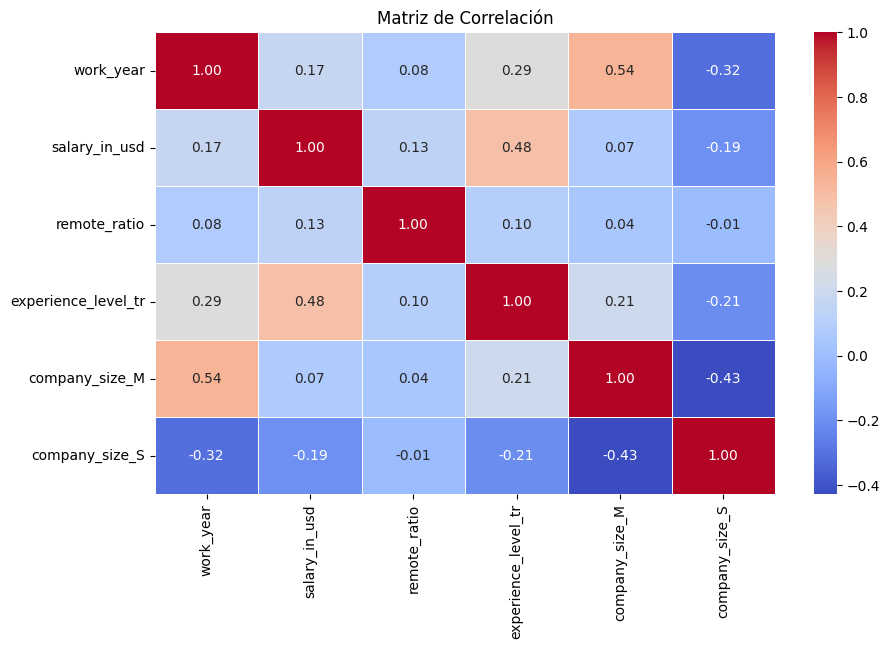

In [134]:
# graficad
correlacion = df_unido.corr()
# 🔹 Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

In [135]:
df #revisar otras variables

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_en_pesos
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,359248500
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1170000000
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,490608000
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,90000000
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,675000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,693000000
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,567000000
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,580500000
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,675000000


Podemos agregar la columna tipo de empleo, dada que también es una variable interesante a la hora de predecir salarios

In [136]:
dummies_employment = pd.get_dummies(df["employment_type"], prefix="employment", drop_first=True).astype(int)
df_unido = pd.concat([df_unido, dummies_employment], axis=1)
df_unido

,work_year,salary_in_usd,remote_ratio,experience_level_tr,company_size_M,company_size_S,employment_FL,employment_FT,employment_PT
0,2020,79833,0,1,0,0,0,1,0
1,2020,260000,0,2,0,1,0,1,0
2,2020,109024,50,2,1,0,0,1,0
3,2020,20000,0,1,0,1,0,1,0
4,2020,150000,50,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
602,2022,154000,100,2,1,0,0,1,0
603,2022,126000,100,2,1,0,0,1,0
604,2022,129000,0,2,1,0,0,1,0
605,2022,150000,100,2,1,0,0,1,0


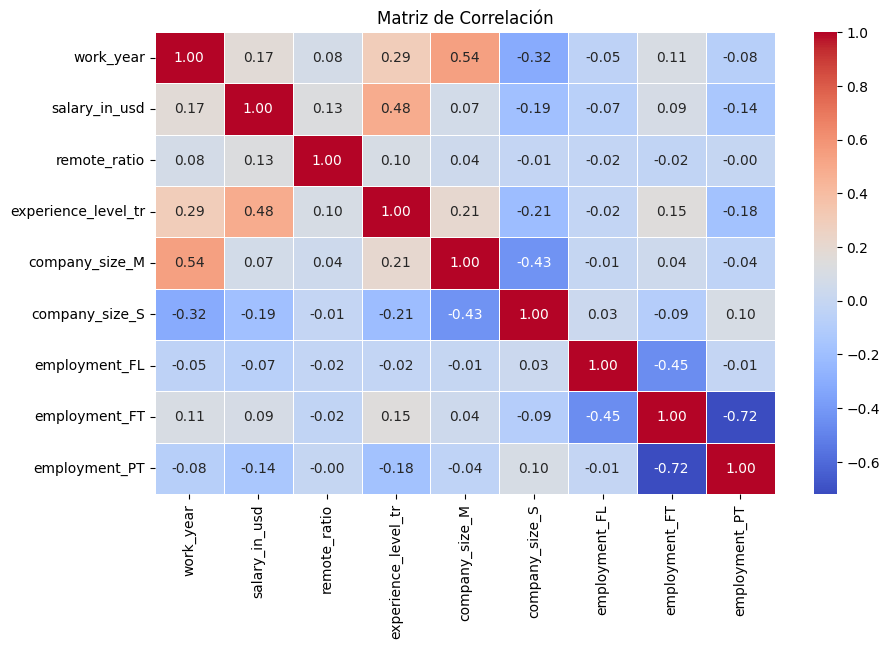

In [137]:
# graficad
correlacion = df_unido.corr()
# 🔹 Crear el mapa de calor
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 🔹 Título del gráfico
plt.title("Matriz de Correlación")

# 🔹 Mostrar el gráfico
plt.show()

### 3.3 Guardar data preprocesada

In [138]:
df_unido.to_csv("/content/drive/MyDrive/CODIGOS _ia/dataPreprocesada1_salaries.csv", index=False)  # index=False evita guardar los índices
